In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.formula. api as sm
import seaborn as sns

In [18]:
df = pd.read_csv('kc_house_data.csv')

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df.shape

(21613, 21)

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
df.drop(columns = ['id', 'date'], inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [26]:
dfz= df.copy()

In [27]:
dfz.shape

(21613, 19)

In [28]:
df['zscore_bedrooms']= np.abs(stats.zscore(df['bedrooms']))
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zscore_bedrooms
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.398737
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0.398737
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.473959
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.676485
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.398737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0.398737
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0.676485
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1.473959
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0.398737


In [29]:
z_outliers = df.loc[df['zscore_bedrooms'] > 3].index
print(z_outliers)

Int64Index([  556,   875,  1135,  1241,  1660,  3119,  3467,  3721,  4024,
             4035,  4067,  4096,  4235,  4717,  4760,  4867,  4868,  6079,
             6174,  6994,  7023,  7191,  8120,  8477,  8484,  8516,  8546,
             8629,  8757,  9077,  9132,  9452,  9659,  9732,  9773,  9854,
            10275, 10787, 10958, 12017, 12605, 12608, 12653, 12765, 12777,
            12885, 13120, 13314, 14030, 14201, 14423, 14915, 15022, 15070,
            15161, 15246, 15521, 15670, 15751, 15870, 16313, 16736, 16844,
            17235, 17335, 18379, 18443, 18460, 18477, 18823, 18975, 19254,
            19302, 19327, 19452],
           dtype='int64')


In [30]:
dfz.iloc[[556, 875,  1135,  1241,  1660,  3119,  3467,  3721,  4024,
             4035,  4067,  4096,  4235,  4717,  4760,  4867,  4868,  6079,
             6174,  6994,  7023,  7191,  8120,  8477,  8484,  8516,  8546,
             8629,  8757,  9077,  9132,  9452,  9659,  9732,  9773,  9854,
            10275, 10787, 10958, 12017, 12605, 12608, 12653, 12765, 12777,
            12885, 13120, 13314, 14030, 14201, 14423, 14915, 15022, 15070,
            15161, 15246, 15521, 15670, 15751, 15870, 16313, 16736, 16844,
            17235, 17335, 18379, 18443, 18460, 18477, 18823, 18975, 19254,
            19302, 19327, 19452]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1135,420000.0,7,3.00,2940,8624,1.0,0,0,3,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,350000.0,7,3.00,2800,9569,1.0,0,2,3,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,1240000.0,7,5.50,6630,13782,2.0,0,0,3,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,575000.0,8,3.00,3840,15990,1.0,0,0,3,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172
19327,824000.0,7,4.25,3670,4000,2.0,0,1,3,8,2800,870,1964,0,98199,47.6375,-122.388,2010,4000


In [31]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(21538, 19)


In [36]:
bins = [200000, 800000, 1800000, 2800000, 4000000, 8000000]

In [37]:
bin_labels = ['grade F', 'grade D', 'grade C', 'grade B', 'grade A']

In [38]:
dfz["price Grades"] = pd.cut(df["price"], bins, labels = bin_labels)
dfz.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price Grades
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,grade F
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,grade F
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,NaN
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,grade F
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,grade F


In [39]:
df['price'].max()

7700000.0

In [40]:
df['price'].min()

75000.0

In [41]:
df['price'].mean()

540088.1417665294

In [42]:
df['price'].median()

450000.0

In [43]:
df['bedrooms'].max()

33

In [44]:
df['bedrooms'].min()

0

In [45]:
df['bathrooms'].max()

8.0

In [46]:
df['bathrooms'].min()

0.0

In [47]:
df['sqft_living'].max()

13540

In [48]:
df['sqft_living'].min()

290

In [49]:
df['floors'].max()

3.5

In [50]:
df.loc[((df['price'] < 600000) & (df['bedrooms'] == 3) & (df['condition'] == 3))] 
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zscore_bedrooms
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.398737
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0.398737
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.473959
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.676485
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.398737
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0.676485
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0.398737
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0.398737
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0.398737
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0.398737


In [51]:
df['price'].groupby(df['bedrooms']).mean()

bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.013727e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [52]:
df['price'].groupby(df['bathrooms']).mean()

bathrooms
0.00    4.481600e+05
0.50    2.373750e+05
0.75    2.945209e+05
1.00    3.470412e+05
1.25    6.212167e+05
1.50    4.093222e+05
1.75    4.548961e+05
2.00    4.578897e+05
2.25    5.336768e+05
2.50    5.535965e+05
2.75    6.602304e+05
3.00    7.084152e+05
3.25    9.703398e+05
3.50    9.319331e+05
3.75    1.197217e+06
4.00    1.267709e+06
4.25    1.525774e+06
4.50    1.333620e+06
4.75    2.021304e+06
5.00    1.673492e+06
5.25    1.817177e+06
5.50    2.522300e+06
5.75    2.492500e+06
6.00    2.946833e+06
6.25    3.094000e+06
6.50    1.709445e+06
6.75    2.734000e+06
7.50    4.500000e+05
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

In [53]:
df['price'].groupby(df['sqft_living']).mean()

sqft_living
290       142000.0
370       276000.0
380       245000.0
384       265000.0
390       236500.0
           ...    
9640     4668000.0
9890     6885000.0
10040    7062500.0
12050    7700000.0
13540    2280000.0
Name: price, Length: 1038, dtype: float64

In [54]:
df['price'].groupby(df['sqft_lot']).mean()

sqft_lot
520         700000.0
572         250000.0
600         367500.0
609        1234570.0
635         256950.0
             ...    
982998      998000.0
1024068     855000.0
1074218     542500.0
1164794     190000.0
1651359     700000.0
Name: price, Length: 9782, dtype: float64

In [55]:
df['price'].groupby(df['floors']).mean()

floors
1.0    4.421806e+05
1.5    5.589806e+05
2.0    6.488912e+05
2.5    1.060346e+06
3.0    5.825260e+05
3.5    9.333125e+05
Name: price, dtype: float64

In [56]:
df['price'].groupby(df['condition']).mean()

condition
1    334431.666667
2    327287.145349
3    542012.578148
4    521200.390033
5    612418.089359
Name: price, dtype: float64

In [57]:
df['price'].groupby(df['grade']).mean()

grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.485240e+05
6     3.019196e+05
7     4.025903e+05
8     5.428528e+05
9     7.735132e+05
10    1.071771e+06
11    1.496842e+06
12    2.191222e+06
13    3.709615e+06
Name: price, dtype: float64

In [58]:
df['price'].groupby(df['yr_built']).mean()

yr_built
1900    581387.206897
1901    556935.931034
1902    673007.407407
1903    480958.195652
1904    583756.644444
            ...      
2011    544522.000000
2012    527447.335294
2013    678545.452736
2014    683681.754919
2015    759785.157895
Name: price, Length: 116, dtype: float64

In [59]:
df['price'].groupby(df['zipcode']).mean()

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
             ...     
98177    6.761854e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028789e+05
98199    7.918208e+05
Name: price, Length: 70, dtype: float64

In [60]:
df.groupby(df['price']).mean()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zscore_bedrooms
price,,,,,,,,,,,,,,,,,,,
75000.0,1.0,0.00,670.0,43377.0,1.0,0.0,0.0,3.0,3.0,670.0,0.0,1966.0,0.0,98022.0,47.2638,-121.906,1160.0,42882.0,2.549182
78000.0,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,1942.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0,1.473959
80000.0,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,1912.0,0.0,98014.0,47.6499,-121.909,1200.0,7500.0,2.549182
81000.0,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,1943.0,0.0,98168.0,47.4808,-122.315,860.0,9000.0,1.473959
82000.0,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,1954.0,0.0,98146.0,47.4987,-122.341,1140.0,11250.0,0.398737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000.0,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,12.0,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0,1.751707
5570000.0,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0,1.751707
6885000.0,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0,2.826929


In [61]:
pd.crosstab(df['condition'], df['grade'])

grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0
2,0,1,5,15,59,75,13,2,2,0,0,0
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11
4,0,0,10,84,685,2833,1394,446,156,56,13,2
5,0,1,0,34,248,833,390,126,55,11,3,0


In [62]:
result = sm.ols('price ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition  + grade + sqft_above + yr_built + lat + long + yr_renovated + zipcode + sqft_lot15 + waterfront + view + sqft_living15', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:53:37   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     150.1005      4.385     34.227      0.000     141.505     158.696
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       31.1276      4.360      7.139      0.000      22.581      39.674
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

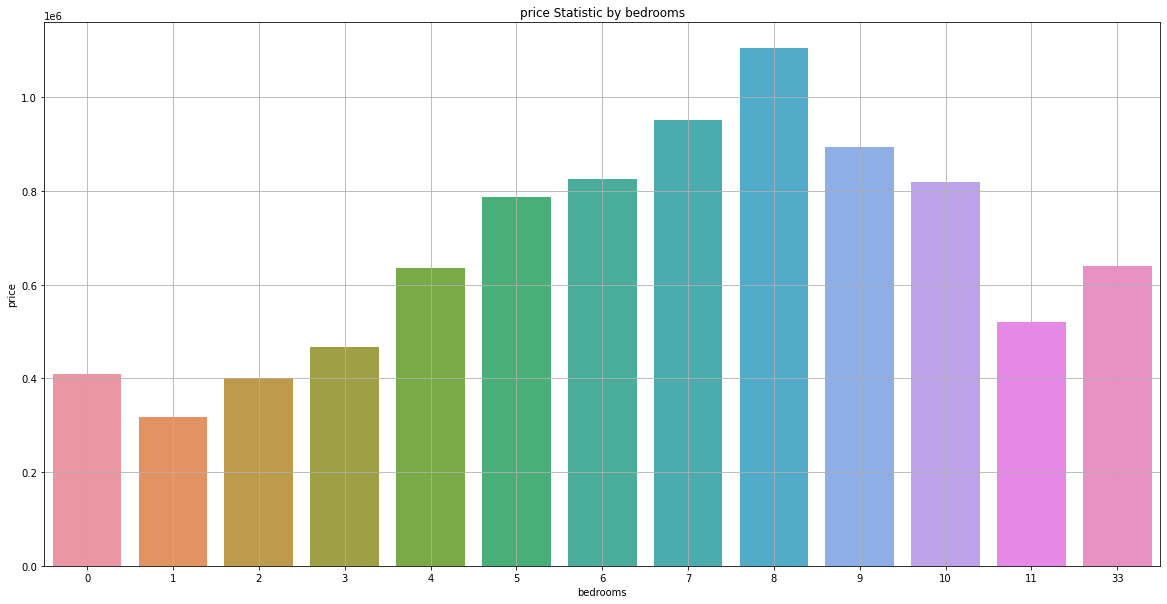

In [63]:
plt.figure(figsize=(20,10))


sns.barplot(data = df, x = "bedrooms", y = "price", ci = None)

plt.title('price Statistic by bedrooms')
plt.grid()

Text(0.5, 1.0, 'price Statistic by bedrooms and condition')

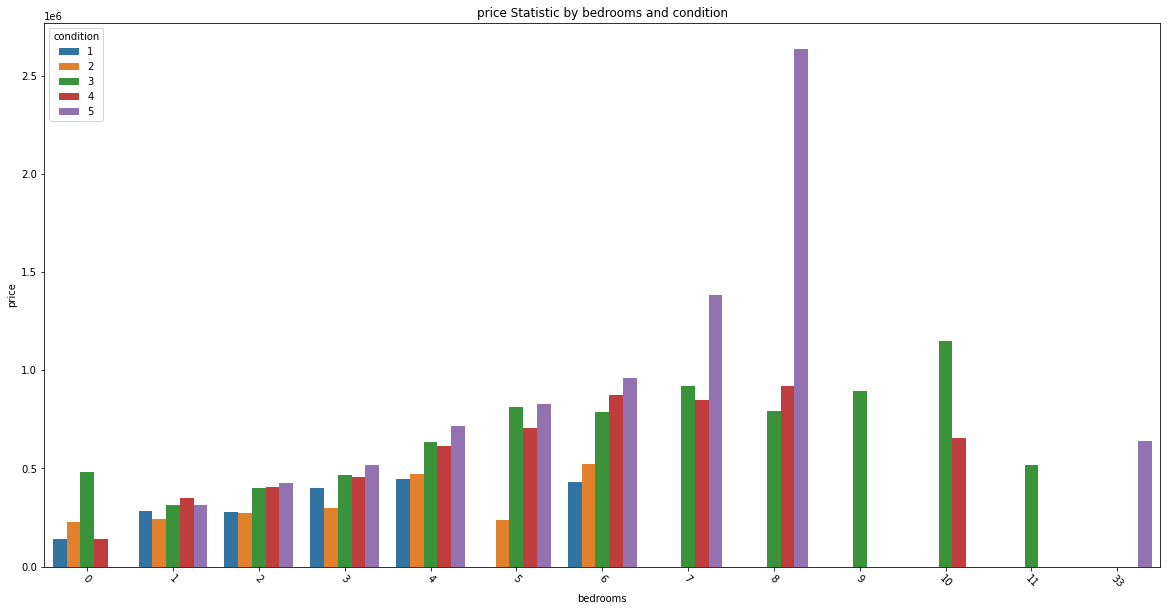

In [64]:
plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "bedrooms", y = "price", hue = "condition", ci = None)

plt.xticks(rotation = -45)
plt.title('price Statistic by bedrooms and condition')

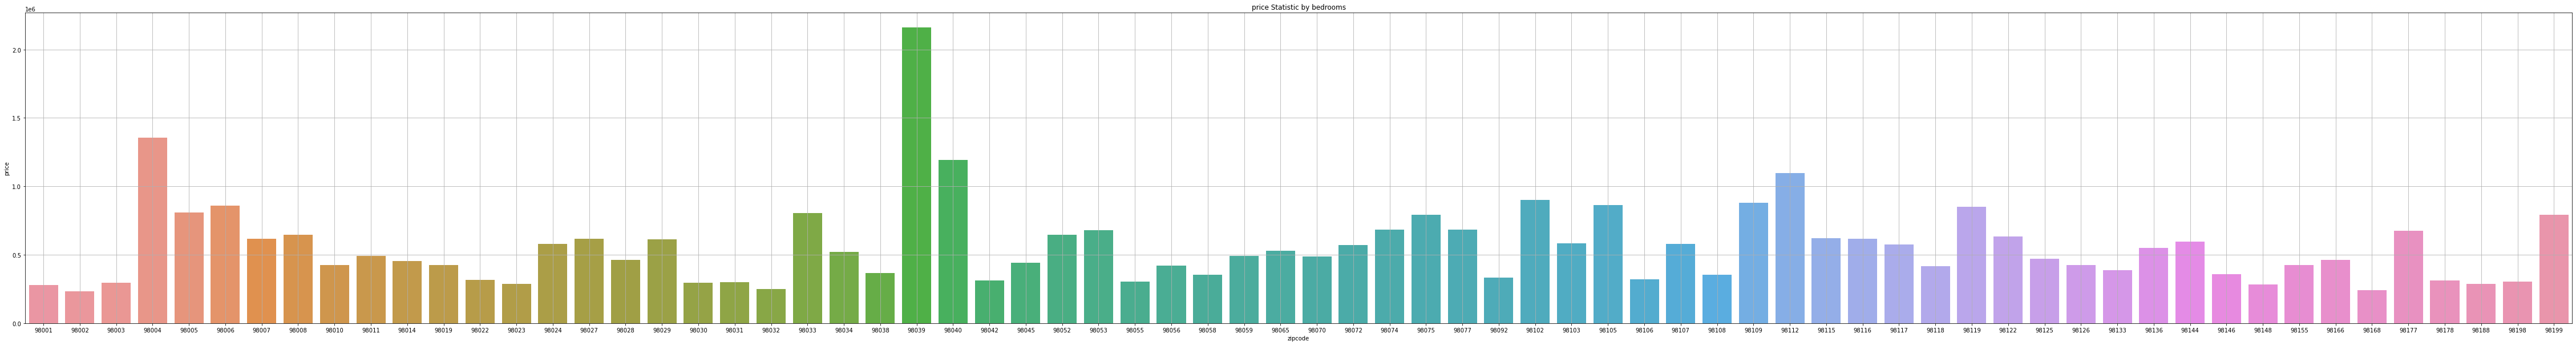

In [65]:
plt.figure(figsize=(80,10))


sns.barplot(data = df, x = "zipcode", y = "price", ci = None)

plt.title('price Statistic by bedrooms')
plt.grid()